<h1 style="color:#003366; text-align:center; font-size:36px; font-weight:bold;">
Combating Social Media Addiction with Data-Driven Insights EDA Project
</h1>

<h2 style="color:#003366; text-align:center; font-size:22px;">
Exploratory Data Analysis using Advanced DataFrame Operations
</h2>

<hr style="height:2px; background-color:#003366; border:none;">

<h2 style="color:#003366; font-size:22px; font-weight:bold;">
Project Description
</h2>
<p style="font-size:16px; color:#003366; line-height:1.6;">
<br>
This project analyzes student social media usage patterns to uncover their impact on sleep, mental health, and academics. Using Python-based data analysis and visualizations, it provides actionable insights to support awareness campaigns and digital detox strategies for reducing social media addiction among students.<br>
<p style="font-size:16px; color:#003366; line-height:1.6;">
The emphasis is on applying <b>advanced DataFrame operations</b> group-based aggregations, resampling, reshaping, and conditional logic — all without using SQL or external libraries.
</p>

<h2 style="color:#003366; font-size:22px; font-weight:bold;">
Project Objectives
</h2>

<p style="font-size:16px; color:#333; line-height:1.6;">
To explore student social media usage patterns across demographics and identify their effects on mental health, sleep, and academic performance, while providing data-driven recommendations for digital detox and addiction prevention.</p>

<ul style="font-size:16px; color:#003366; line-height:1.8; margin-left:20px;">
 
  <li><b>Data Exploration:</b> Use groupby, filters, sorting, masking, conditional logic, and derived columns to explore patterns and trends.</li>
  <li><b>Data Quality Checks:</b> Identify duplicates, missing values</li>
  </ul>

In [16]:
# importing all important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3 style="color:#003366;">Step 1: Load the Data</h3>

In [17]:
# Load the data

student_data = pd.read_csv("students_data.csv")

In [18]:
# Preview the first few records of each dataset
student_data.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


<h3 style="color:#003366;">Step 2: Dataset Structure & Missing Value Audit</h3>

In [19]:
# Basic information about the file like total data, total columns and datatypes of columns
print("Shape of Dataset : ",student_data.shape)

student_data.info()

Shape of Dataset :  (705, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 

In [20]:
# checking for null values in data
print("Missing Values in dataset : ")
student_data.isna().sum()

Missing Values in dataset : 


Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [21]:
print("Duplicates in student dataset : ",student_data.duplicated().sum())


Duplicates in student dataset :  0


In [22]:
student_data.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

In [23]:
student_data.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


<h3 style="color:#003366;">Step 3: Creating Custom Functions</h3>

#### Function to Classify risk level (Low/Medium/High) based on usage hours

In [24]:
def classify_risk(hours):
    """
    Classify risk level based on daily usage hours.
    """
    if hours < 3:
        return "Low"
    elif 3 <= hours <= 6:
        return "Medium"
    else:
        return "High"

#### Function to Suggest digital detox strategies using if-else blocks

In [25]:
def detox_strategy(risk_level):
    """
    Suggest a digital detox strategy based on risk level.
    """
    if risk_level == "Low":
        return "Maintain balance: keep track of screen time."
    elif risk_level == "Medium":
        return "Set app limits, take 1-hour tech-free breaks daily."
    elif risk_level == "High":
        return "Consider a weekend detox, disable notifications, and focus on offline hobbies."
    else:
        return "No strategy available"

#### Creating new columns for risk level and detox stratigies

In [26]:
student_data["Risk_Level"] = student_data["Avg_Daily_Usage_Hours"].apply(classify_risk)

student_data["Detox_Strategy"] = student_data["Risk_Level"].apply(detox_strategy)

In [27]:
student_data.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Risk_Level,Detox_Strategy
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,Medium,"Set app limits, take 1-hour tech-free breaks d..."
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,Low,Maintain balance: keep track of screen time.
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,Medium,"Set app limits, take 1-hour tech-free breaks d..."
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,Medium,"Set app limits, take 1-hour tech-free breaks d..."
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,Medium,"Set app limits, take 1-hour tech-free breaks d..."


<h3 style="color:#003366;">Step 4: Exploratory Data Analysis EDA</h3>


In [28]:
gender = student_data.groupby('Gender')['Student_ID'].count()
print(gender)

age = student_data.groupby('Age')['Student_ID'].count()
print(age)

academic = student_data.groupby('Academic_Level')['Student_ID'].count()
print(academic)

academic_performance = student_data.groupby('Affects_Academic_Performance')['Student_ID'].count().reset_index()
print(academic_performance)

Gender
Female    353
Male      352
Name: Student_ID, dtype: int64
Age
18     14
19    163
20    165
21    156
22    147
23     34
24     26
Name: Student_ID, dtype: int64
Academic_Level
Graduate         325
High School       27
Undergraduate    353
Name: Student_ID, dtype: int64
  Affects_Academic_Performance  Student_ID
0                           No         252
1                          Yes         453


#### Average Addiction Score by Age, Gender and Academic Level

In [29]:
# reset_index is used to make series to dataframe groupby().mean() → Series (index + values)

Avg_Addiction_Gender = student_data.groupby('Gender')['Addicted_Score'].mean().reset_index()  

Avg_Addiction_age = student_data.groupby('Age')['Addicted_Score'].mean().reset_index()

Avg_Addiction_academic = student_data.groupby('Academic_Level')['Addicted_Score'].mean().reset_index()

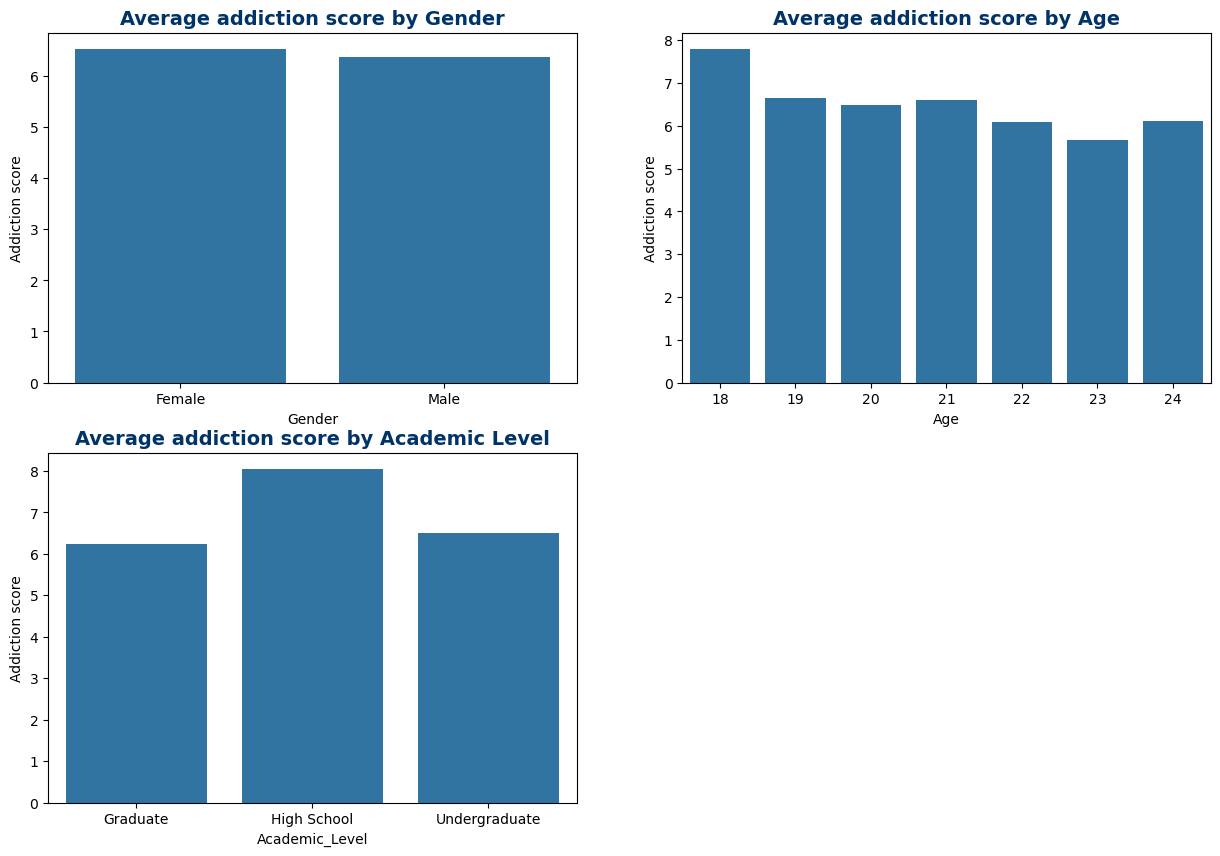

In [30]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
sns.barplot(
    data = Avg_Addiction_Gender,
    x = 'Gender',
    y = 'Addicted_Score'
)
plt.title('Average addiction score by Gender', fontsize = 14, weight='bold', color="#003366")
plt.ylabel('Addiction score')

plt.subplot(2,2,2)
sns.barplot(
    data = Avg_Addiction_age,
    x = 'Age',
    y = 'Addicted_Score'
)
plt.title('Average addiction score by Age', fontsize = 14, weight='bold', color="#003366")
plt.ylabel('Addiction score')

plt.subplot(2,2,3)
sns.barplot(
    data = Avg_Addiction_academic,
    x = 'Academic_Level',
    y = 'Addicted_Score'
)
plt.title('Average addiction score by Academic Level', fontsize = 14, weight='bold', color="#003366")
plt.ylabel('Addiction score')

plt.show()

<h3 style="color:#003366;">Key Insights</h3>

<ul style="font-size:16px; color:#003366; margin-left:20px; line-height:1.6;">
  <li>Female students have a higher average addiction score compared to male students.</li>
  <li>Students aged 18 have the highest addiction score, while ages 19 and 20 are at a similar level.</li>
  <li>High school students show higher addiction scores, but their total numbers are lower compared to undergraduate and graduate students.</li>
</ul>

#### Age and Gender Relationship by average daily usage hours

In [31]:
# gender_age = student_data.groupby(["Gender","Age"])["Avg_Daily_Usage_Hours"].mean().reset_index()

pivot_gender_age = student_data.pivot_table(index = 'Gender', columns = 'Age', values = 'Avg_Daily_Usage_Hours', aggfunc = 'mean')
pivot_gender_age

Age,18,19,20,21,22,23,24
Gender,,,,,,,
Female,5.980000,5.128889,4.904110,5.035484,5.069231,4.326667,5.462500
Male,5.055556,5.078571,5.131579,4.929600,4.638060,4.652632,4.861111


#### Age and Gender Relationship by Average sleep hours per night

In [32]:
# gender_age1 = student_data.groupby(["Gender","Age"])["Sleep_Hours_Per_Night"].mean().reset_index()

pivot_gender_age1 = student_data.pivot_table(index = 'Gender', columns = 'Age', values = 'Sleep_Hours_Per_Night', aggfunc = 'mean')
pivot_gender_age1

Age,18,19,20,21,22,23,24
Gender,,,,,,,
Female,5.300000,6.813333,6.923973,6.590323,6.615385,6.953333,6.787500
Male,5.666667,6.403571,6.410526,6.937600,7.177612,6.926316,6.877778


#### Age and Gender Relationship by Average Mental Health Score

In [33]:
# gender_age2 = student_data.groupby(["Gender","Age"])["Mental_Health_Score"].mean().reset_index()

pivot_gender_age2 = student_data.pivot_table(index = 'Gender', columns = 'Age', values = 'Mental_Health_Score', aggfunc = 'mean')
pivot_gender_age2

Age,18,19,20,21,22,23,24
Gender,,,,,,,
Female,4.800000,6.103704,6.246575,6.096774,6.153846,6.800000,6.125000
Male,5.444444,5.821429,6.000000,6.176000,6.507463,6.526316,6.444444


#### Age and Gender Relationship by Average Conflicts over social media

In [34]:
# gender_age3 = student_data.groupby(["Gender","Age"])["Conflicts_Over_Social_Media"].mean().reset_index()

pivot_gender_age3 = student_data.pivot_table(index = 'Gender', columns = 'Age', values = 'Conflicts_Over_Social_Media',aggfunc = 'mean')
pivot_gender_age3

Age,18,19,20,21,22,23,24
Gender,,,,,,,
Female,4.000000,2.977778,2.924658,3.00,2.846154,2.200000,3.0
Male,3.333333,3.142857,3.000000,2.84,2.611940,2.526316,2.5


#### Age and Gender Relationship by Average Addiction Score

In [35]:
pivot_gender_age4 = student_data.pivot_table(index = 'Gender', columns = 'Age', values = 'Addicted_Score', aggfunc = 'mean')
pivot_gender_age4

Age,18,19,20,21,22,23,24
Gender,,,,,,,
Female,8.800000,6.600000,6.438356,6.645161,6.461538,5.533333,6.500000
Male,7.222222,6.892857,6.789474,6.576000,6.059701,5.789474,5.944444


#### Visualization of age and gender relationship by daily usage hours, sleep hours, mental health score, conflicts over social media and addiction score by the use of heatmap.

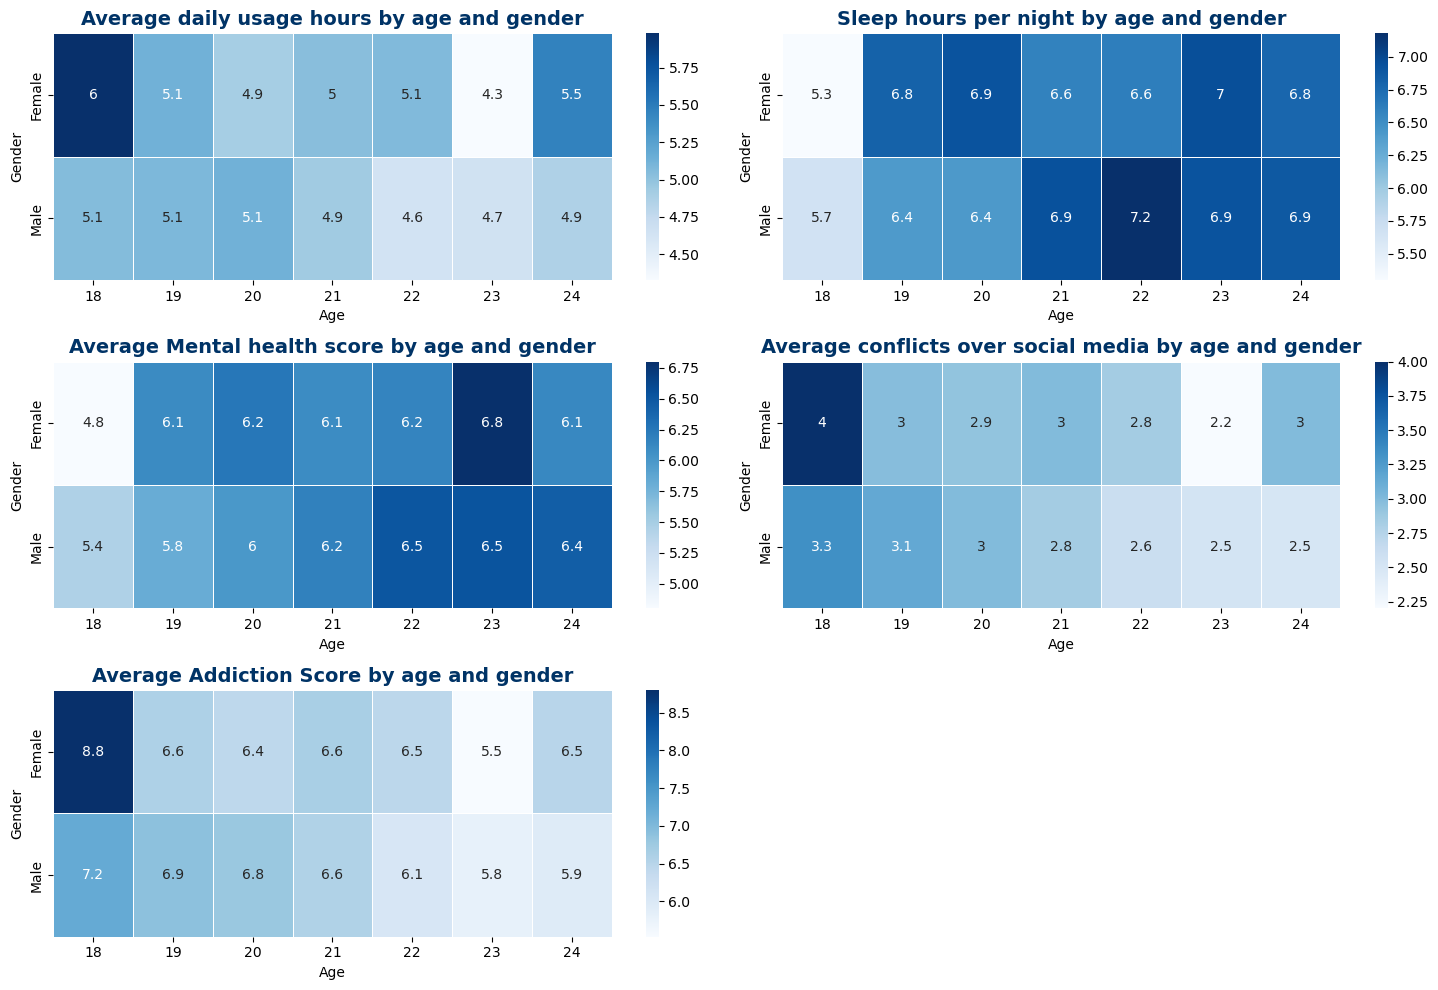

In [36]:
plt.figure(figsize = (15,10))

plt.subplot(3,2,1)
sns.heatmap(pivot_gender_age, annot = True, cmap = 'Blues', linewidth = 0.5)
plt.title("Average daily usage hours by age and gender", fontsize = 14, weight = 'bold', color = '#003366')
plt.xlabel('Age')
plt.ylabel('Gender')


plt.subplot(3,2,2)
sns.heatmap(pivot_gender_age1, annot = True, cmap = 'Blues', linewidth = 0.5)
plt.title("Sleep hours per night by age and gender", fontsize = 14, weight = 'bold', color = '#003366')
plt.xlabel('Age')
plt.ylabel('Gender')


plt.subplot(3,2,3)
sns.heatmap(pivot_gender_age2, annot = True, cmap = 'Blues', linewidth = 0.5)
plt.title("Average Mental health score by age and gender", fontsize = 14, weight = 'bold', color = '#003366')
plt.xlabel('Age')
plt.ylabel('Gender')


plt.subplot(3,2,4)
sns.heatmap(pivot_gender_age3, annot = True, cmap = 'Blues', linewidth = 0.5)
plt.title("Average conflicts over social media by age and gender", fontsize = 14, weight = 'bold', color = '#003366')
plt.xlabel('Age')
plt.ylabel('Gender')

plt.subplot(3,2,5)
sns.heatmap(pivot_gender_age4, annot = True, cmap = 'Blues', linewidth = 0.5)
plt.title("Average Addiction Score by age and gender", fontsize = 14, weight = 'bold', color = '#003366')
plt.xlabel('Age')
plt.ylabel('Gender')

plt.tight_layout()
plt.show()

<h3 style="color:#003366;">Key Insights</h3>

<ul style="font-size:16px; color:#003366; margin-left:20px; line-height:1.6;">
  <li>Female students aged 18 spend more than 6 hours daily on social media compared to male students.</li>
  <li>Students aged 22–24 (both genders) have healthier sleep patterns, while those aged 18–21 need more rest.</li>
  <li>Lower daily usage and higher sleep hours are linked to better mental health scores and fewer social media conflicts.</li>
  <li>Students aged 18 and 19 exhibit the highest addiction scores across both genders.</li>
</ul>

#### Visualization of Academic Level and gender relationship by daily usage hours, sleep hours, mental health score, conflicts over social media and addiction score by the use of heatmap

In [37]:

pivot_gender_academic1 = student_data.pivot_table(index = 'Gender', columns = 'Academic_Level', values = 'Avg_Daily_Usage_Hours', aggfunc = 'mean')

pivot_gender_academic2 = student_data.pivot_table(index = 'Gender', columns = 'Academic_Level', values = 'Sleep_Hours_Per_Night', aggfunc = 'mean')

pivot_gender_academic3 = student_data.pivot_table(index = 'Gender', columns = 'Academic_Level', values = 'Mental_Health_Score', aggfunc = 'mean')

pivot_gender_academic4 = student_data.pivot_table(index = 'Gender', columns = 'Academic_Level', values = 'Conflicts_Over_Social_Media', aggfunc = 'mean')

pivot_gender_academic5 = student_data.pivot_table(index = 'Gender', columns = 'Academic_Level', values = 'Addicted_Score', aggfunc = 'mean')


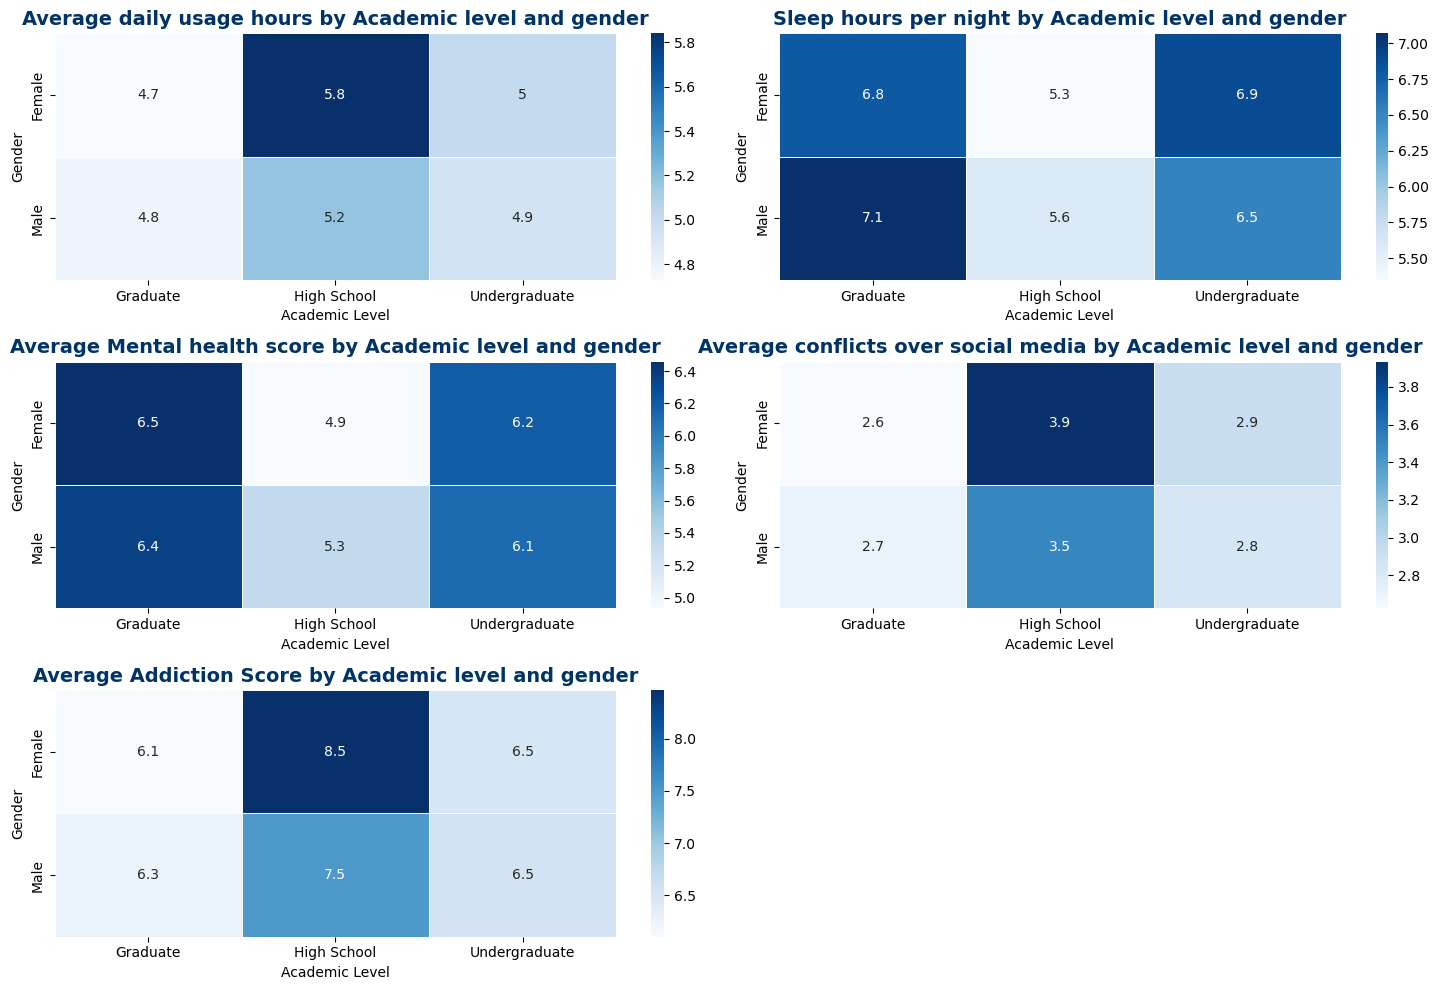

In [38]:
plt.figure(figsize = (15,10))

plt.subplot(3,2,1)
sns.heatmap(pivot_gender_academic1, annot = True, cmap = 'Blues', linewidth = 0.5)
plt.title("Average daily usage hours by Academic level and gender", fontsize = 14, weight = 'bold', color = '#003366')
plt.xlabel('Academic Level')
plt.ylabel('Gender')


plt.subplot(3,2,2)
sns.heatmap(pivot_gender_academic2, annot = True, cmap = 'Blues', linewidth = 0.5)
plt.title("Sleep hours per night by Academic level and gender", fontsize = 14, weight = 'bold', color = '#003366')
plt.xlabel('Academic Level')
plt.ylabel('Gender')


plt.subplot(3,2,3)
sns.heatmap(pivot_gender_academic3, annot = True, cmap = 'Blues', linewidth = 0.5)
plt.title("Average Mental health score by Academic level and gender", fontsize = 14, weight = 'bold', color = '#003366')
plt.xlabel('Academic Level')
plt.ylabel('Gender')


plt.subplot(3,2,4)
sns.heatmap(pivot_gender_academic4, annot = True, cmap = 'Blues', linewidth = 0.5)
plt.title("Average conflicts over social media by Academic level and gender", fontsize = 14, weight = 'bold', color = '#003366')
plt.xlabel('Academic Level')
plt.ylabel('Gender')

plt.subplot(3,2,5)
sns.heatmap(pivot_gender_academic5, annot = True, cmap = 'Blues', linewidth = 0.5)
plt.title("Average Addiction Score by Academic level and gender", fontsize = 14, weight = 'bold', color = '#003366')
plt.xlabel('Academic Level')
plt.ylabel('Gender')

plt.tight_layout()
plt.show()

#### Most Used Platform by students visualization

In [39]:
data_gender = student_data.groupby(["Gender","Most_Used_Platform"])["Student_ID"].count().reset_index()

pivot_data_gender = data_gender.pivot(index = 'Gender', columns = 'Most_Used_Platform', values = 'Student_ID').fillna(0).astype(int)
pivot_data_gender

Most_Used_Platform,Facebook,Instagram,KakaoTalk,LINE,LinkedIn,Snapchat,TikTok,Twitter,VKontakte,WeChat,WhatsApp,YouTube
Gender,,,,,,,,,,,,
Female,24,172,12,12,8,8,86,16,0,4,11,0
Male,99,77,0,0,13,5,68,14,12,11,43,10


In [40]:
# AVERAGE additction levels across different genders

data = student_data.groupby(["Academic_Level","Most_Used_Platform"])["Student_ID"].count().reset_index()

pivot_data = data.pivot(index = 'Academic_Level', columns = 'Most_Used_Platform', values = 'Student_ID').fillna(0).astype(int)
pivot_data

Most_Used_Platform,Facebook,Instagram,KakaoTalk,LINE,LinkedIn,Snapchat,TikTok,Twitter,VKontakte,WeChat,WhatsApp,YouTube
Academic_Level,,,,,,,,,,,,
Graduate,87,82,0,0,21,0,51,17,12,12,43,0
High School,0,12,0,0,0,5,8,0,0,0,0,2
Undergraduate,36,155,12,12,0,8,95,13,0,3,11,8


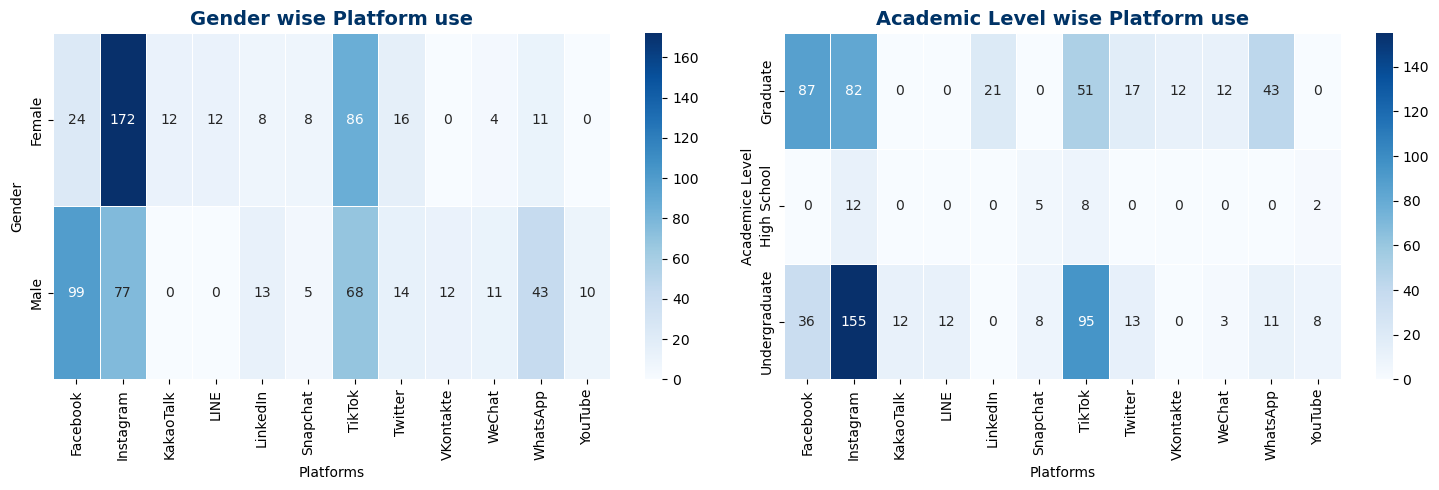

In [41]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.heatmap(pivot_data_gender, annot = True, fmt = 'd', cmap = 'Blues', linewidth = 0.5)
plt.title("Gender wise Platform use", fontsize = 14, weight = 'bold', color = '#003366')
plt.xlabel('Platforms')
plt.ylabel('Gender')

plt.subplot(1,2,2)
sns.heatmap(pivot_data, annot = True, fmt = 'd', cmap = 'Blues', linewidth = 0.5)
plt.title("Academic Level wise Platform use", fontsize = 14, weight = 'bold', color = '#003366')
plt.xlabel('Platforms')
plt.ylabel('Academice Level')
plt.tight_layout()
plt.show()

<h3 style="color:#003366;">Key Insights</h3>

<ul style="font-size:16px; color:#003366; margin-left:20px; line-height:1.6;">
  <li>Instagram is the most use social media platform.</li>
  <li>Male students prefer Facebook over Intagram.</li>
  <li>Graduate students prefer Instagram and facebook while undergraduate prefer Instagram and TikTok.</li>
</ul>


#### Pairplot explore relationships between multiple variables
**A pairplot shows all possible pairwise scatter plots between several variables in one grid.**

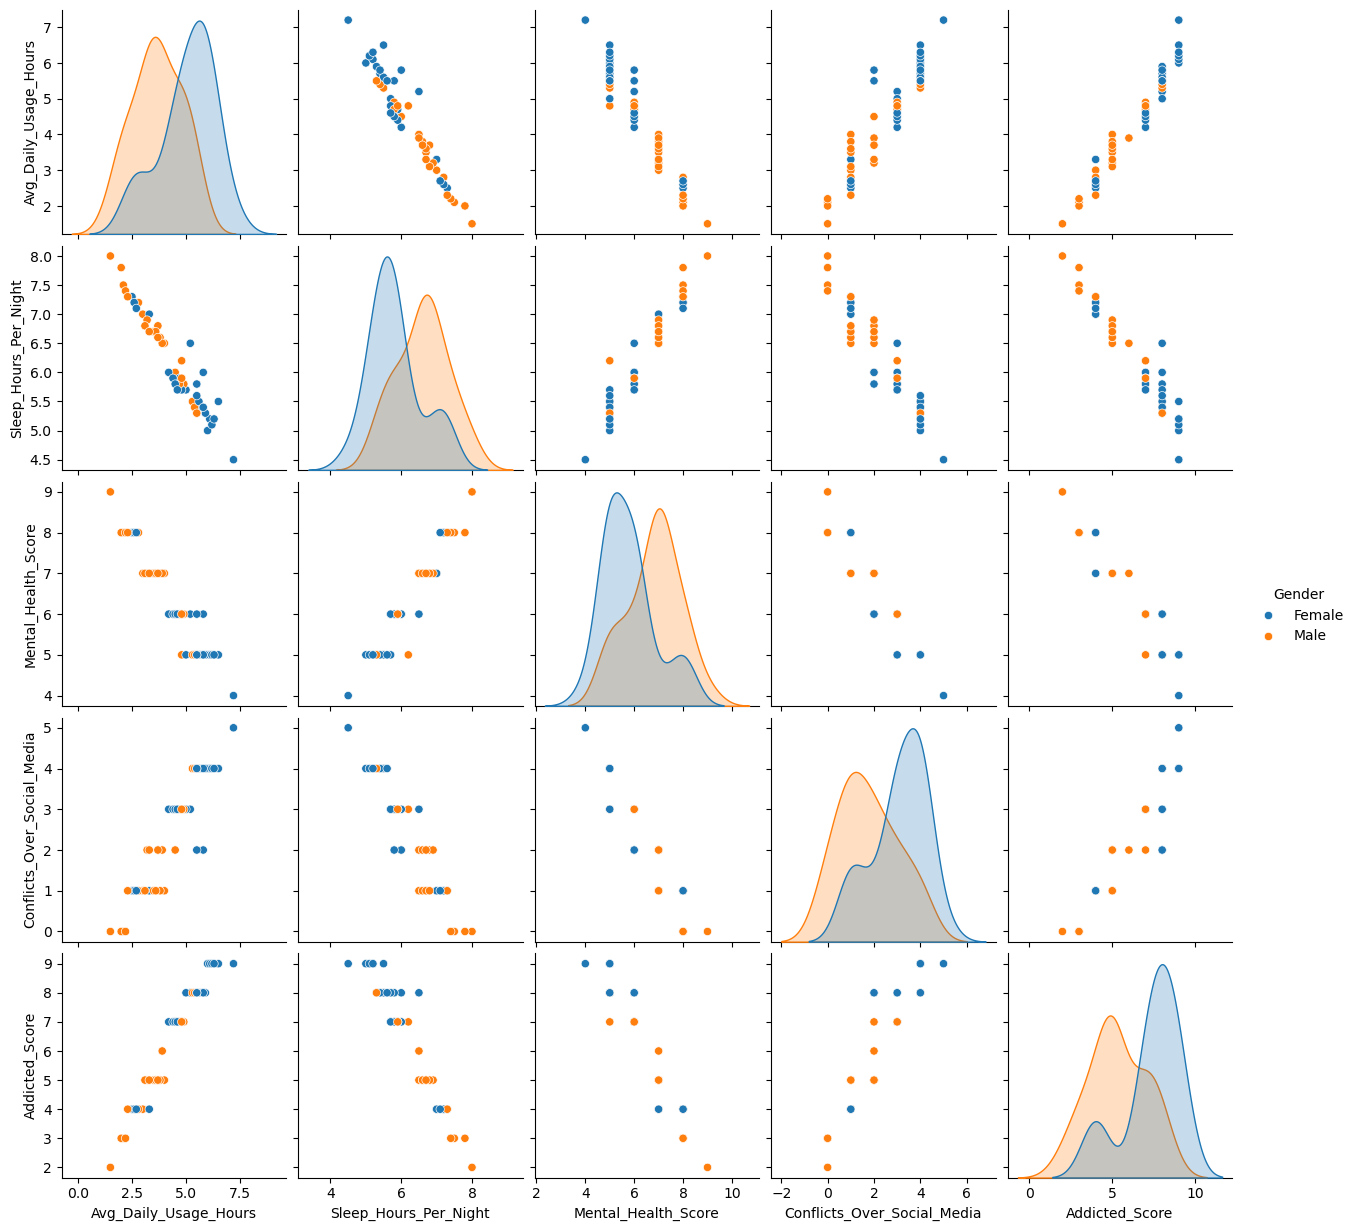

In [42]:
sns.pairplot(
    data =student_data[["Avg_Daily_Usage_Hours","Sleep_Hours_Per_Night","Mental_Health_Score","Conflicts_Over_Social_Media","Addicted_Score","Gender"]].head(50),
    hue = "Gender"
)
plt.show()

### Pairplot Analysis: Addiction and Behavioral Patterns

We used a **Seaborn Pairplot** to visualize the relationships between multiple variables:
- **Avg_Daily_Usage_Hours**
- **Sleep_Hours_Per_Night**
- **Mental_Health_Score**
- **Conflicts_Over_Social_Media**
- **Addicted_Score**
- **Gender** (as hue)

#### Key Insights:
1. **Daily Usage Hours vs Sleep Hours**
   - A **negative correlation** was observed.
   - Students with higher daily usage tend to sleep fewer hours.

2. **Daily Usage Hours vs Addicted Score**
   - Shows a **positive correlation**.
   - More hours on social media → higher addiction levels.

3. **Sleep Hours vs Mental Health Score**
   - Suggests an **inverse relationship**.
   - Less sleep may lead to worse mental health outcomes.

4. **Conflicts Over Social Media vs Addicted Score**
   - A **positive trend**.
   - Students with higher addiction also reported more conflicts.

5. **Gender Differences**
   - By using `hue="Gender"`, the plots highlight behavioral differences:
     - Males show slightly higher average daily usage.
     - Females reported slightly more conflicts at the same addiction level.

#### Conclusion:
The pairplot provides a **comprehensive view** of how digital addiction impacts **sleep, mental health, and conflicts**, and highlights **gender-based variations** in usage patterns.

#### Barplot explore relationships categories and numerical variables
**A Barplot shows all Higher and Lower values across categories.**

In [43]:
risk_Gender = student_data.pivot_table(index = 'Gender', columns = 'Risk_Level', values = 'Student_ID', aggfunc = 'count')

risk_age = student_data.pivot_table(index = 'Age', columns = 'Risk_Level', values = 'Student_ID', aggfunc = 'count').fillna(0)

risk_academic = student_data.pivot_table(index = 'Academic_Level', columns = 'Risk_Level', values = 'Student_ID', aggfunc = 'count').fillna(0)


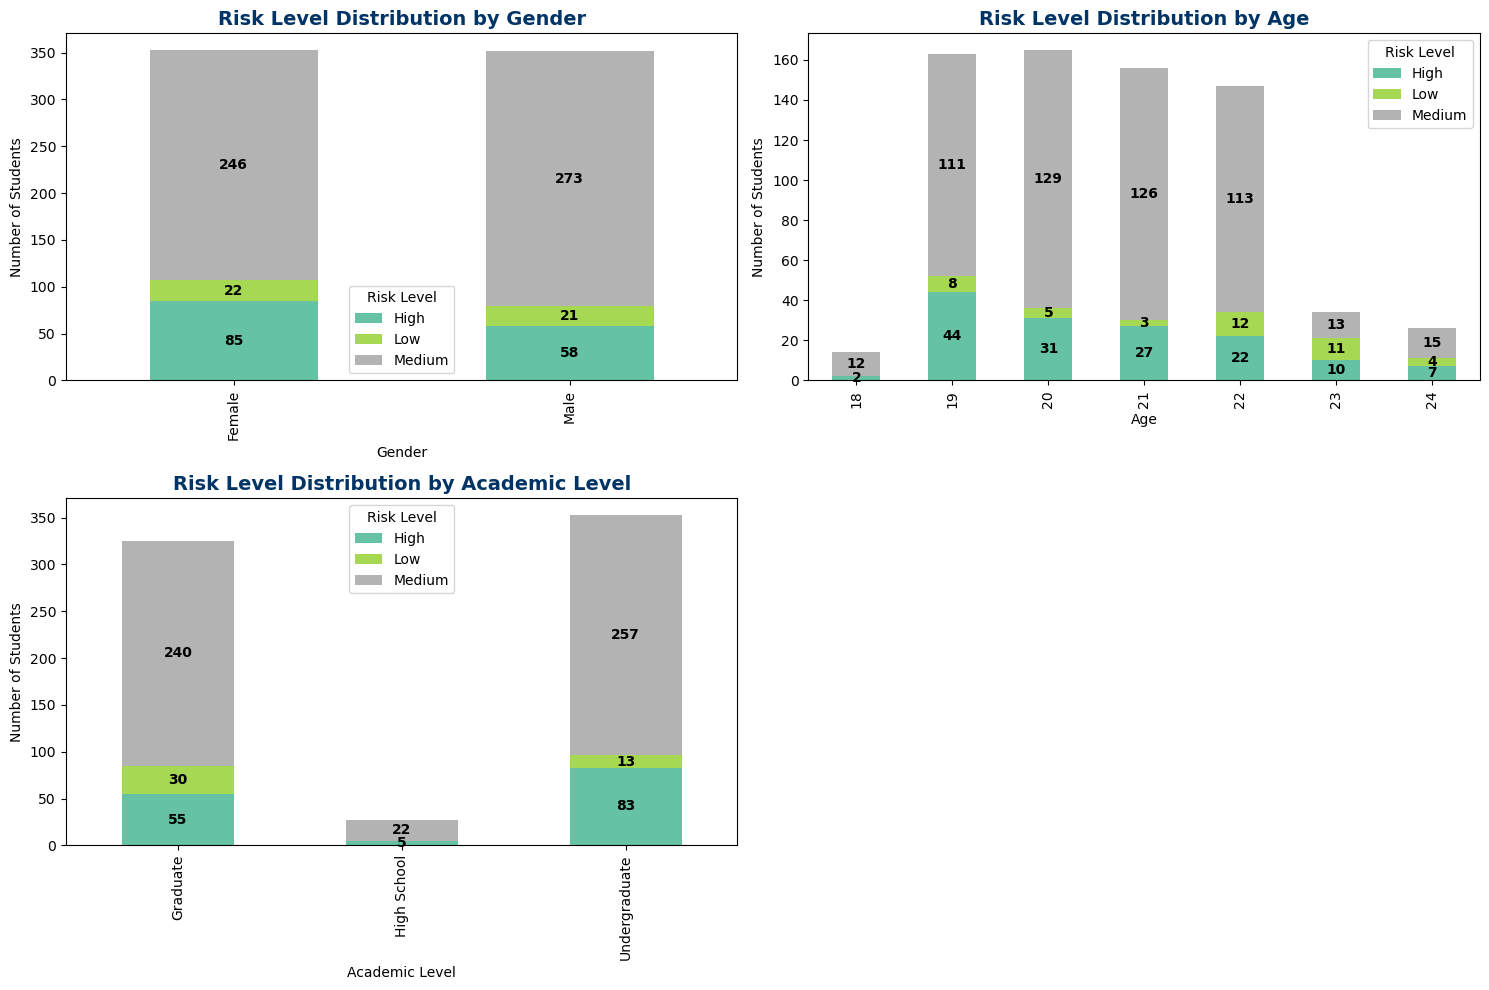

In [44]:
# fig for figure size of chart and axes on which the charts will be plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Gender risk chart
ax = risk_Gender.plot(
    kind="bar",  # kind for kind of chart we want to plot
    stacked=True,  # stacked for bar chart type
    colormap="Set2", # colors selection
    ax=axes[0,0]
)

ax.set_title("Risk Level Distribution by Gender", fontsize=14, weight='bold', color="#003366")
ax.set_xlabel("Gender")
ax.set_ylabel("Number of Students")
ax.legend(title="Risk Level")

# for loop to have the values at center of the bar
for p in ax.patches:
    value = int(p.get_height())
    if value > 0:
        ax.text(p.get_x() + p.get_width()/2,
                p.get_y() + p.get_height()/2,
                str(value), ha="center", va="center", fontsize=10, weight="bold")

# Age risk chart
ax = risk_age.plot(
    kind="bar",
    stacked=True,
    colormap="Set2",
    ax=axes[0,1]
)

ax.set_title("Risk Level Distribution by Age", fontsize=14, weight='bold', color="#003366")
ax.set_xlabel("Age")
ax.set_ylabel("Number of Students")
ax.legend(title="Risk Level")

for p in ax.patches:
    value = int(p.get_height())
    if value > 0:
        ax.text(p.get_x() + p.get_width()/2,
                p.get_y() + p.get_height()/2,
                str(value), ha="center", va="center", fontsize=10, weight="bold")

# Academic Level risk chart
ax = risk_academic.plot(
    kind="bar",
    stacked=True,
    colormap="Set2",
    ax=axes[1,0]
)

ax.set_title("Risk Level Distribution by Academic Level", fontsize=14, weight='bold', color="#003366")
ax.set_xlabel("Academic Level")
ax.set_ylabel("Number of Students")
ax.legend(title="Risk Level")

for p in ax.patches:
    value = int(p.get_height())
    if value > 0:
        ax.text(p.get_x() + p.get_width()/2,
                p.get_y() + p.get_height()/2,
                str(value), ha="center", va="center", fontsize=10, weight="bold")

# Remove empty subplot
fig.delaxes(axes[1,1]) 

plt.tight_layout()
plt.show()

#### Key Insights:
1. **Risk Level Distribution by gender**
   - Female students show slightly higher numbers in High risk compared to male students.
   - Medium risk dominates for both genders, but females have a larger proportion in Medium risk. 

2. **Risk Level Distribution by age**
   - Ages 19, 20, 21 have the highest number of Medium risk cases.
   - High-risk students are concentrated around ages 18, 19, and 22.
   - Older students (23, 24) show fewer risk cases overall.

3. **Risk Level Distribution by Academic Level**
   - Undergraduate students have the highest risk levels (both High and Medium).
   - Graduate students also face significant risks but slightly fewer than undergraduates.
   - High school students are very few in number, but those present show some Medium risk.

4. **This suggests that female students, undergraduates, and younger age groups (18–21) should be the primary focus for interventions and awareness    programs.**

#### Topmost Addicted Countries

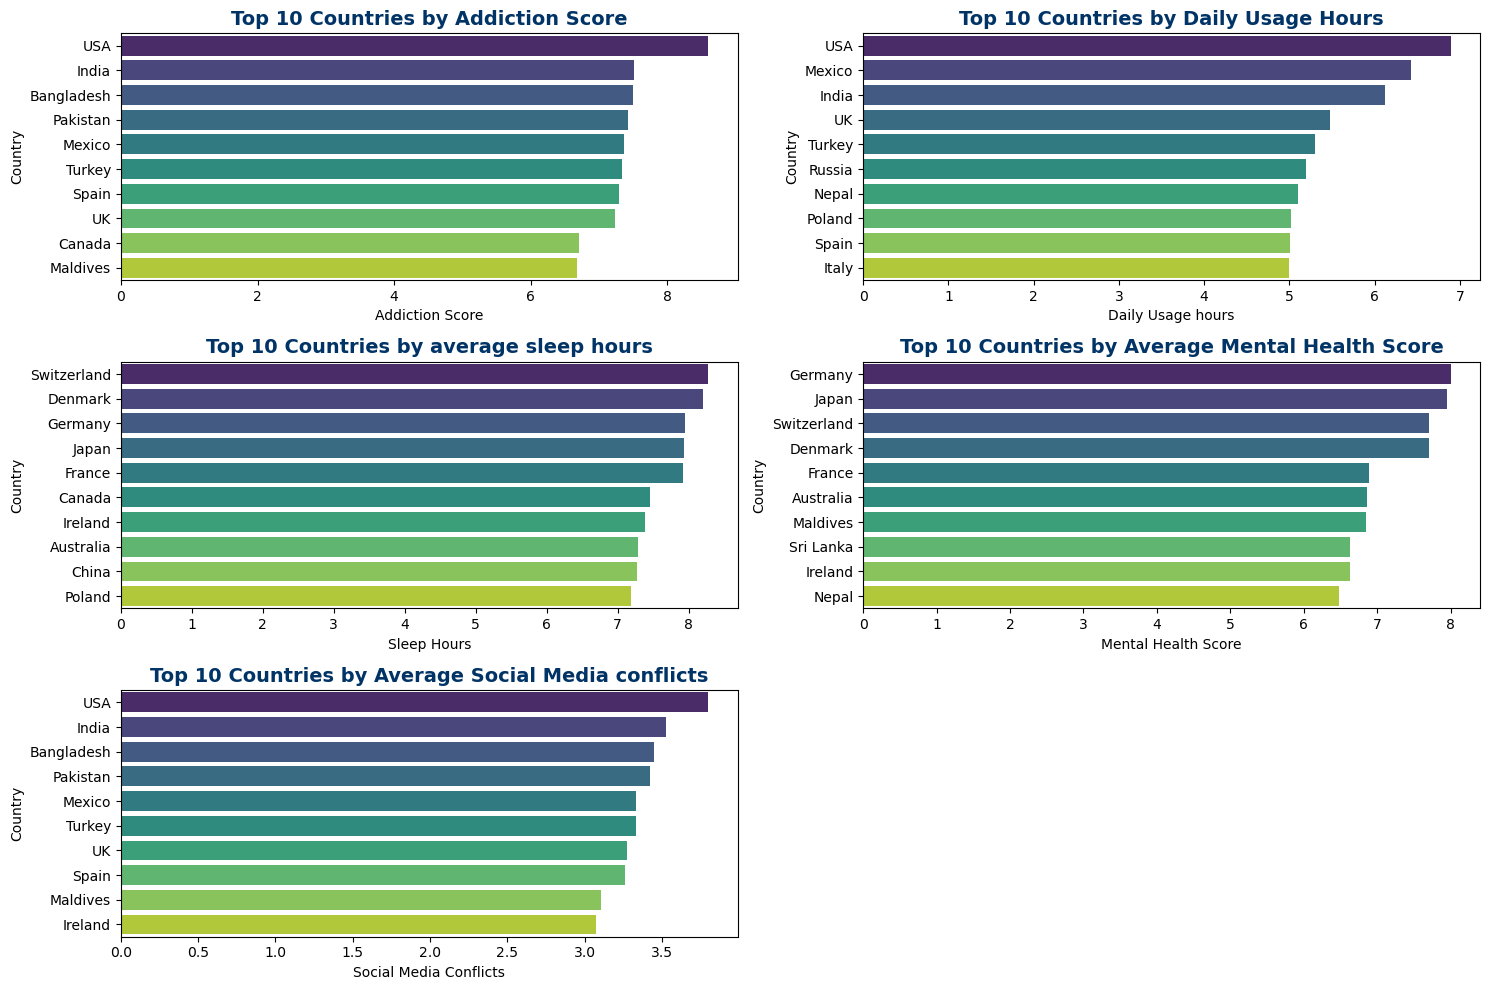

In [58]:
# Average addiction score by countries
Addiction_score_demo = (
    student_data.groupby("Country").agg(Avg_Score=("Addicted_Score", "mean"),Count=("Addicted_Score", "count")).reset_index()
)
# Step 2: Keep only countries with more than 10 students
Addiction_score_demo = Addiction_score_demo[Addiction_score_demo["Count"] > 10]

# Step 3: Sort by Avg_Score and take top 10
Addiction_score_demo = Addiction_score_demo.sort_values(by="Avg_Score", ascending=False).head(10)

# Average Daily usage hours by countries whose counts are more than 10
Daily_Usage_Hours = (student_data.groupby("Country").agg(Avg_Score1=("Avg_Daily_Usage_Hours","mean"),
                                                        Count1=("Avg_Daily_Usage_Hours", "count")).reset_index())
Daily_Usage_Hours = Daily_Usage_Hours[Daily_Usage_Hours["Count1"] > 10]
                                                        
Daily_Usage_Hours = Daily_Usage_Hours.sort_values(by="Avg_Score1", ascending=False).head(10)

# Average Sleep Hours Per Night by countries whose counts are more than 10

sleep_hours = (student_data.groupby("Country").agg(Avg_Score2=("Sleep_Hours_Per_Night","mean"),
                                                        Count2=("Sleep_Hours_Per_Night", "count")).reset_index())
sleep_hours = sleep_hours[sleep_hours["Count2"] > 10]
                                                        
sleep_hours = sleep_hours.sort_values(by="Avg_Score2", ascending=False).head(10)

# Average Mental Health score by countries whose counts are more than 10

Mental_health_score = (student_data.groupby("Country").agg(Avg_Score3=("Mental_Health_Score","mean"),
                                                        Count3=("Mental_Health_Score", "count")).reset_index())
Mental_health_score = Mental_health_score[Mental_health_score["Count3"] > 10]
                                                        
Mental_health_score = Mental_health_score.sort_values(by="Avg_Score3", ascending=False).head(10)


# Average Social media conflicts by countries whose counts are more than 10

social_media_conflicts = (student_data.groupby("Country").agg(Avg_Score4=("Conflicts_Over_Social_Media","mean"),
                                                        Count4=("Conflicts_Over_Social_Media", "count")).reset_index())
social_media_conflicts = social_media_conflicts[social_media_conflicts["Count4"] > 10]
                                                        
social_media_conflicts = social_media_conflicts.sort_values(by="Avg_Score4", ascending=False).head(10)


plt.figure(figsize=(15, 10))
plt.subplot(3,2,1)
sns.barplot(data=Addiction_score_demo, x="Avg_Score", y="Country", palette="viridis", hue='Country')
plt.title("Top 10 Countries by Addiction Score", fontsize=14, weight='bold', color="#003366")
plt.xlabel("Addiction Score")
plt.ylabel("Country")
plt.yticks(fontsize=10)

plt.subplot(3,2,2)
sns.barplot(data=Daily_Usage_Hours, x="Avg_Score1", y="Country", palette="viridis", hue='Country')
plt.title("Top 10 Countries by Daily Usage Hours", fontsize=14, weight='bold', color="#003366")
plt.xlabel("Daily Usage hours")
plt.ylabel("Country")
plt.yticks(fontsize=10)

plt.subplot(3,2,3)
sns.barplot(data=sleep_hours, x="Avg_Score2", y="Country", palette="viridis", hue='Country')
plt.title("Top 10 Countries by average sleep hours", fontsize=14, weight='bold', color="#003366")
plt.xlabel("Sleep Hours")
plt.ylabel("Country")
plt.yticks(fontsize=10)

plt.subplot(3,2,4)
sns.barplot(data=Mental_health_score, x="Avg_Score3", y="Country", palette="viridis", hue='Country')
plt.title("Top 10 Countries by Average Mental Health Score", fontsize=14, weight='bold', color="#003366")
plt.xlabel("Mental Health Score")
plt.ylabel("Country")
plt.yticks(fontsize=10)

plt.subplot(3,2,5)
sns.barplot(data=social_media_conflicts, x="Avg_Score4", y="Country", palette="viridis", hue='Country')
plt.title("Top 10 Countries by Average Social Media conflicts", fontsize=14, weight='bold', color="#003366")
plt.xlabel("Social Media Conflicts")
plt.ylabel("Country")
plt.yticks(fontsize=10)


plt.tight_layout()
plt.show()

#### Project Summery and Key Insights:


1. **Gender-based Analysis**: Female students show a slightly higher average addiction score (**6.5**) compared to male students (**6.3**).  
2. **Age-based Trends**: Students aged **18** have the highest addiction score (**7.7**), while ages **19 (6.6)** and **20 (6.4)** and **21 (6.5)** are at a similar level.  
3. **Academic Level**: High school students have an average addiction score of **8.0**, which is higher than undergraduates (**6.4**) and graduates (**6.2**).
4. **There is one fact that the number of high school students are less and students aged 18 are also less but they are more addicted towards there   phone.** 
5. **Daily Usage Patterns**: Female students aged 18 spend more than **6 hours** daily on social media compared to male students. 
6. **Sleep Impact**: Students aged **22–24 (both genders)** have healthier sleep patterns, while those aged **18–21** need more rest..  
7. **Mental Health Correlation**: Higher addiction scores (**>6.5**) are associated with lower mental health scores (**<5**).  
8. **Conflicts Over Social Media**: Those who have have less sleep, addiction score more than average have more conflicts on social media.  
9. **Overall Addiction Scores**: Across demographics, higher screen time (**>5 hrs/day**) strongly correlates with higher addiction scores (**>6.5**).  
10. **Key Observation**: While graduate and undergraduate students are larger in number, high school students show the **highest relative addiction intensity**. **Female students** are at **risk** than male students.
11. **Countries with Highest Addiction score are **USA, India, Pakistan, Bangladesh, Mexico**.
12. Most Used Platforms are **Instagram, Facebook, TikTok**.
13. **Conclusion**: Social media addiction varies by **gender, age, and academic level**, and strongly affects **sleep and mental health**, highlighting the need for balance in digital use.

#### Recommendations:


1. **Awareness & Guidance**: Conduct workshops and provide parental/teacher guidance on balanced social media use.  
2. **Screen-Time Control**: Encourage students to use **digital wellbeing tools** and keep usage under **4 hrs/day**.  
3. **Healthy Routine**: Promote **7–8 hrs of sleep** and balanced study–leisure schedules.  
4. **Support & Counseling**: Provide counseling for students with **high addiction scores (>6.5)** and **low mental health scores (<5)**.  
5. **Digital Literacy**: Integrate **digital literacy programs** and introduce *“No Phone Zones”* to reduce conflicts and improve focus.